In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



df = pd.read_csv('/kaggle/input/mental-health-in-tech-survey/survey.csv')
print("ORIGINAL DATASET:", df.shape)
print(df.head())
print(df.info())




ORIGINAL DATASET: (1259, 27)
             Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No 

In [ ]:

#cleaning missing dara : age and gender
df = df[(df['Age'] >= 18) & (df['Age'] <= 99)]
def clean_gender(Gender):
    g= str(Gender).strip().lower()
    if Gender in ['male', 'm', 'man','cis male', 'cis-male','malr' ,'Male-ish']:
        return 'Male'
    elif Gender in ['female','f','woman', 'cis female', 'cis-female']:
        return 'Female'
    elif Gender in ['trans','non-binary','nonbinary']:
        return 'Non-binary'
    else:
        return 'Other'
df['Gender_clean']= df['Gender'].apply(clean_gender)

In [ ]:
#MISSING VALUES:
missing = df.isnull().sum()
print('Missing Values Per column:')
print(missing)
df = df.dropna(subset=['Age','Gender','treatment'])

for col in df.select_dtypes(include='object'):
    df[col] = df[col].fillna(df[col].mode()[0])
for col in df.select_dtypes(include=np.number):
    df[col] = df[col].fillna(df[col].median())
print("new data with no missing value",df.isnull().sum())

Missing Values Per column:
Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         513
self_employed                  18
family_history                  0
treatment                       0
work_interfere                262
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1090
Gender_clean                    0
dtype: int64
new data

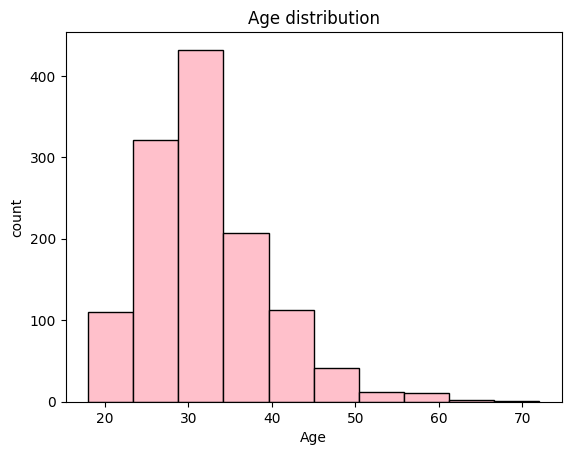

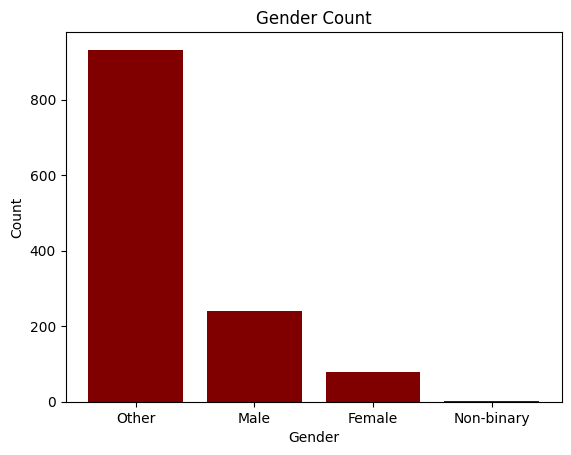

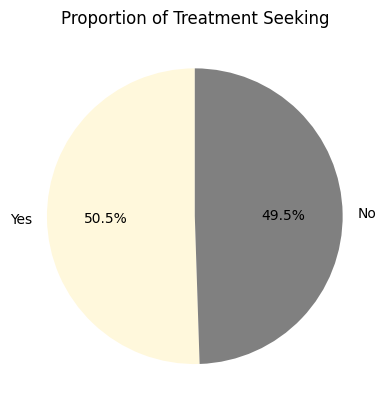

In [ ]:
#univariate
plt.hist(df['Age'],color= 'pink',edgecolor='black')
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

plt.bar(df['Gender_clean'].value_counts().index, df['Gender_clean'].value_counts().values, color="maroon")
plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

df['treatment'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['cornsilk','grey'])
plt.title('Proportion of Treatment Seeking')
plt.ylabel('')
plt.show()

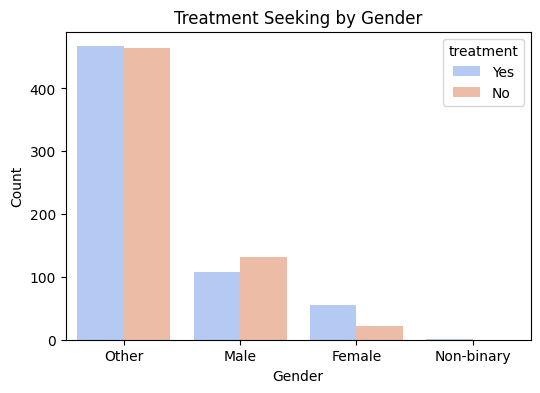

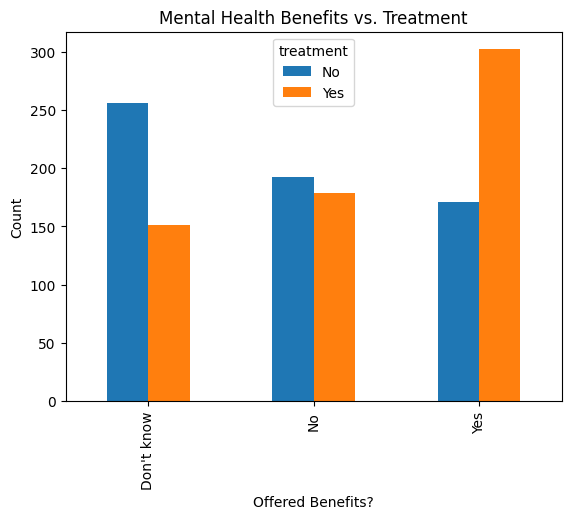

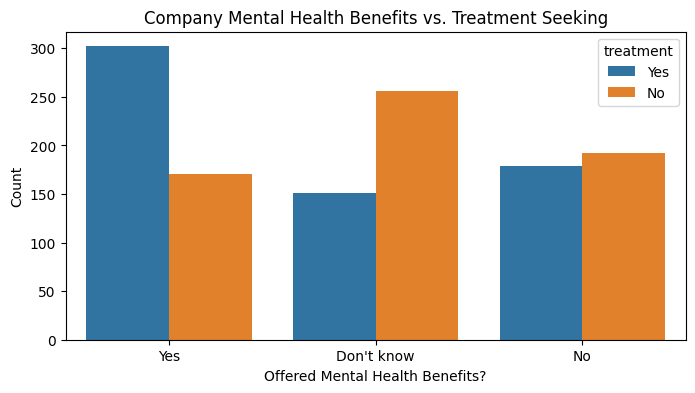

In [ ]:
#bivariate analysis
#Treatment seeking vs. gender 
plt.figure(figsize=(6,4))
sns.countplot(x='Gender_clean', hue='treatment', data=df, palette='coolwarm')
plt.title('Treatment Seeking by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()
# mental health benefits vs treatment
if 'benefits' in df.columns:
    pd.crosstab(df['benefits'], df['treatment']).plot(kind='bar')
    plt.title('Mental Health Benefits vs. Treatment')
    plt.xlabel('Offered Benefits?')
    plt.ylabel('Count')
    plt.show()
# Company Support vs. Treatment
if 'benefits' in df.columns:
    plt.figure(figsize=(8,4))
    sns.countplot(x='benefits', hue='treatment', data=df)
    plt.title('Company Mental Health Benefits vs. Treatment Seeking')
    plt.xlabel('Offered Mental Health Benefits?')
    plt.ylabel('Count')
    plt.show()

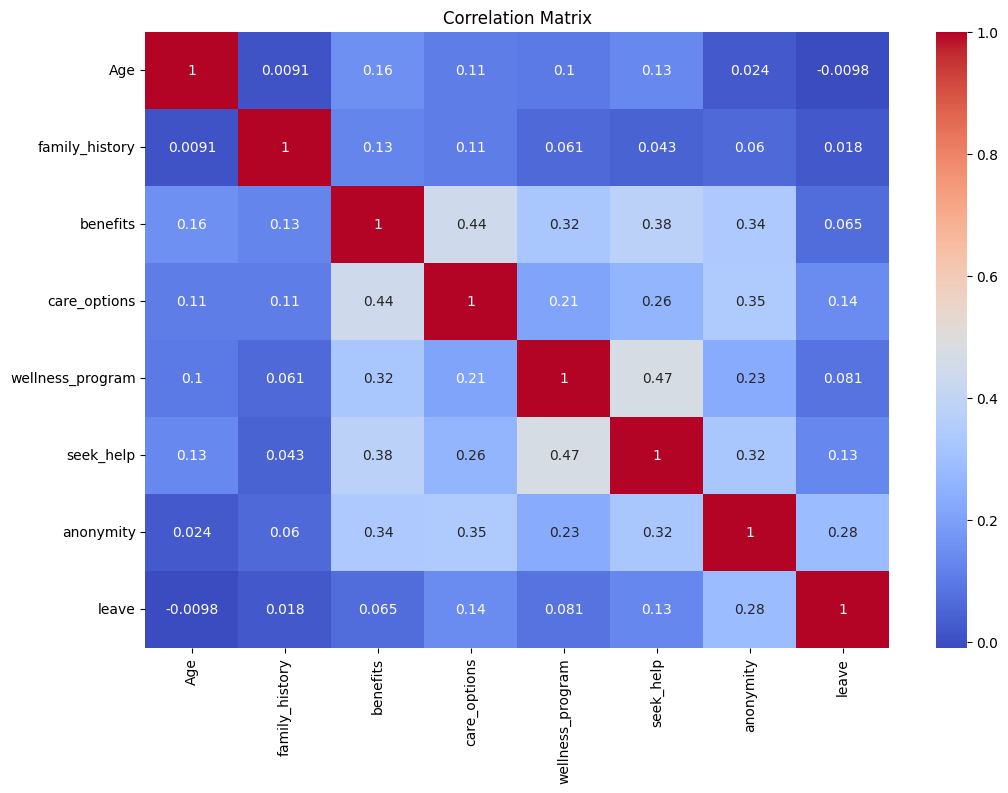

In [ ]:
#Multivariate Analysis
encode_candidates = [
    'gender', 'family_history', 'benefits', 'care_options',
    'wellness_program', 'seek_help', 'anonymity', 'leave'
]
encodable = [col for col in encode_candidates if col in df.columns]

encoded = df.copy()
for col in encodable:
    encoded[col] = encoded[col].astype('category').cat.codes

correlation = encoded.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



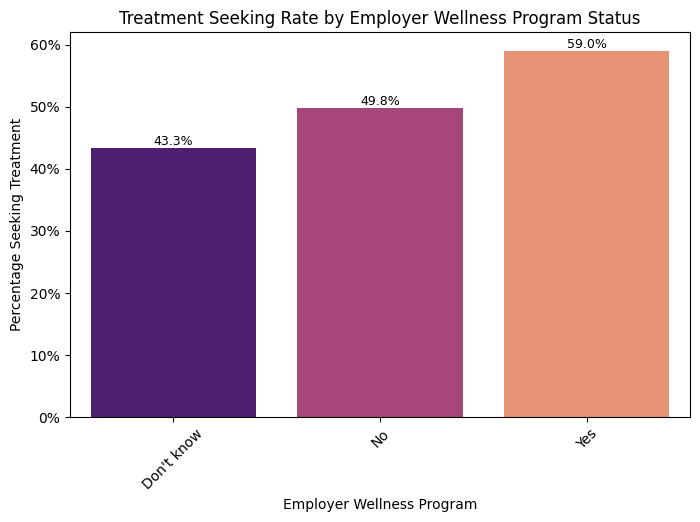

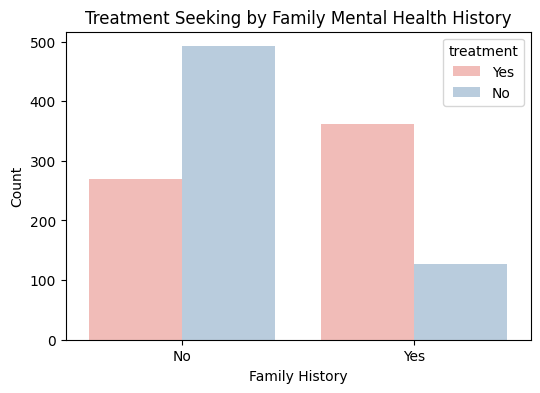

In [ ]:
# 6. Highlight Key Patterns

import matplotlib.ticker as mtick

#Treatment seeking by employer wellness program 
if {'wellness_program', 'treatment'}.issubset(df.columns):
    wellness_rates = df.groupby('wellness_program')['treatment'].apply(lambda x: (x == 'Yes').mean()).sort_values()
    plt.figure(figsize=(8,5))
    ax = sns.barplot(x=wellness_rates.index, y=wellness_rates.values, palette='magma')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    plt.title('Treatment Seeking Rate by Employer Wellness Program Status')
    plt.ylabel('Percentage Seeking Treatment')
    plt.xlabel('Employer Wellness Program')
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.1%}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9, color='black')
    plt.xticks(rotation=45)
    plt.show()

#Family history grouping vs treatment seeking (grouped countplot)
if {'family_history', 'treatment'}.issubset(df.columns):
    plt.figure(figsize=(6,4))
    sns.countplot(x='family_history', hue='treatment', data=df, palette='Pastel1')
    plt.title('Treatment Seeking by Family Mental Health History')
    plt.ylabel('Count')
    plt.xlabel('Family History')
    plt.show()

#mean age vs treatment seeking
if {'treatment', 'age'}.issubset(df.columns):
    plt.figure(figsize=(6,4))
    sns.pointplot(x='treatment', y='age', data=df, ci=None, palette='Set2')
    plt.title('Mean Age by Treatment Seeking')
    plt.ylabel('Mean Age')
    plt.xlabel('Treatment Seeking')
    plt.show()


In [ ]:
df.to_csv('/kaggle/working/cleaned_mental_health.csv', index=False)
